### **사전 실행 작업**
- colab에서 한글표시를 위해서 폰트 설치위해 코드 실행하기 :
- 이 셀 실행후 런타임 >세션 다시 시작하기

In [ ]:
# 이 부분은 colab 이 아니면 실행안해도 됩니다.
# colab에서 한글표시를 위해서 폰트 설치위해 코드 실행하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 미세먼지농도 데이터 분석

### 0. 분석 목적  
- 미세먼지 농도 값을 분석하여 서울시 각 구별로 1년동안 가장 미세먼지 나쁨일 수가 많은 구를 찾는다.  

### 1. 데이터 가져와 살펴보기
### 2. 데이터 전처리하기
### 3. 분석단계
### 4. 정보표현 - 가시화

### **1. 데이터 가져와 살펴보기**

##### 구글 Colab에서 공유된 파일 다운로드해서 가져오기 - 미세먼지데이터
https://docs.google.com/spreadsheets/d/1TdJJ8xsyh1-tLckkZsc6nhQDnW3xJGQn/edit?usp=drive_link&ouid=107185739454461468234&rtpof=true&sd=true <br>
이런 "링크가 있는 모든 사용자"가 사용할 수 있는 파일 링크에서 <br>
 /d/ 앞이랑    /edit? 뒤를 모두 날려서 id 추출

In [ ]:
!gdown 1TdJJ8xsyh1-tLckkZsc6nhQDnW3xJGQn

**1) 데이터 처리와 연산을 위한 패키지 불러오기**

In [3]:
# numpy와 pandas 가져와 as np, pd 로 사용하기
import pandas as pd        #... 코드 작성
import numpy as np         #... 코드 작성

**2) 판다스 데이터프레임 df1 에 엑셀 파일 읽어서 저장하기**

In [4]:
# 판다스 read_excel()를 사용하여 "2018_PM.xlsx" 읽어 df에 저장하기 : 필요시 경로지정
df = pd.read_excel("2018_PM.xlsx")             #... 코드 작성

**3) 상위/하위 데이터 5개 출력하기**

In [5]:
# .head()를 사용하여 저장한 df 자료의 위에서 5개까지 읽어오기
df.head(5)              #... 코드 작성

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,111121,중구,2018010101,0.004,0.5,0.020,0.020,34.0,19.0,서울 중구 덕수궁길 15
1,서울 중구,111121,중구,2018010102,0.004,0.4,0.024,0.016,27.0,14.0,서울 중구 덕수궁길 15
2,서울 중구,111121,중구,2018010103,0.004,0.4,0.018,0.022,26.0,14.0,서울 중구 덕수궁길 15
3,서울 중구,111121,중구,2018010104,0.004,0.5,0.010,0.030,26.0,15.0,서울 중구 덕수궁길 15
4,서울 중구,111121,중구,2018010105,0.004,0.6,0.011,0.029,28.0,16.0,서울 중구 덕수궁길 15


In [6]:
# .tail()를 사용하여 저장한 df1 자료의 끝에서 10개까지 읽어오기
df.tail(10)              #... 코드 작성

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
343094,서울 노원구,111312,화랑로,2018123115,0.005,0.6,0.010,0.029,51.0,34.0,서울 노원구 화랑로 429
343095,서울 노원구,111312,화랑로,2018123116,0.005,0.5,0.008,0.031,52.0,31.0,서울 노원구 화랑로 429
343096,서울 노원구,111312,화랑로,2018123117,0.004,0.3,0.010,0.028,36.0,20.0,서울 노원구 화랑로 429
343097,서울 노원구,111312,화랑로,2018123118,0.004,0.4,0.006,0.034,29.0,17.0,서울 노원구 화랑로 429
343098,서울 노원구,111312,화랑로,2018123119,0.004,0.5,0.004,0.036,30.0,18.0,서울 노원구 화랑로 429
343099,서울 노원구,111312,화랑로,2018123120,0.004,0.5,0.005,0.036,35.0,22.0,서울 노원구 화랑로 429
343100,서울 노원구,111312,화랑로,2018123121,0.005,0.9,0.004,0.041,40.0,22.0,서울 노원구 화랑로 429
343101,서울 노원구,111312,화랑로,2018123122,0.005,1.1,0.004,0.044,45.0,23.0,서울 노원구 화랑로 429
343102,서울 노원구,111312,화랑로,2018123123,0.005,1.0,0.004,0.040,51.0,23.0,서울 노원구 화랑로 429
343103,서울 노원구,111312,화랑로,2018123124,0.005,1.0,0.004,0.037,43.0,26.0,서울 노원구 화랑로 429


**4) 데이터 형태 확인하기**

In [7]:
# .shape 사용하여 데이터 형태 확인하기
df.shape              #... 코드 작성

(343104, 11)

In [8]:
# 데이터 정보 확인하기 info()
df.info()              #... 코드 작성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343104 entries, 0 to 343103
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      343104 non-null  object 
 1   측정소코드   343104 non-null  int64  
 2   측정소명    343104 non-null  object 
 3   측정일시    343104 non-null  int64  
 4   SO2     330883 non-null  float64
 5   CO      331084 non-null  float64
 6   O3      331687 non-null  float64
 7   NO2     332877 non-null  float64
 8   PM10    325985 non-null  float64
 9   PM25    298218 non-null  float64
 10  주소      343104 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 28.8+ MB


## 2. 데이터 전처리하기

**1) 필요한 데이터만 가져와 새로운 데이터프레임 생성하기**

In [33]:
# "지역","측정일시","PM10" 세 항목을 갖은 새 데이터프레임을 df1 에 저장하기
# 방법1 : 필요한 항목으로 새로운 df 생성하기
df1 = df[["지역","측정일시","PM10"]]              #... 코드 작성

# 방법2 :  불필요한 항목 삭제
# df1 = df.drop(columns=['측정소코드','측정소명','SO2','CO','O3','NO2','PM25','주소'])

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343104 entries, 0 to 343103
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      343104 non-null  object 
 1   측정일시    343104 non-null  int64  
 2   PM10    325985 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.9+ MB


**2)결측치 처리하기**

In [35]:
# isnull() 사용하여 NaN 값이 있는지 확인
df1.isnull()            # == df1.isna()

,지역,측정일시,PM10
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
343099,False,False,False
343100,False,False,False
343101,False,False,False
343102,False,False,False


In [36]:
# NaN 갯수 합계 구하기
df1.isna().sum()              #... 코드 작성

지역          0
측정일시        0
PM10    17119
dtype: int64

In [37]:
# .mean() 사용하여 PM10 컬럼 평균구하기
PM10_mean = df["PM10"].mean()              #... 코드 작성
PM10_mean

42.12807951286102

In [38]:
# PM10 컬럼 평균값으로 null 값 채우기
df1["PM10"] = df1["PM10"].fillna(value=PM10_mean)              #... 코드 작성
# == df1["PM10"].fillna(value=PM10_mean, inplace=True)

<ipython-input-38-36b7145db341>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["PM10"] = df1["PM10"].fillna(value=PM10_mean)              #... 코드 작성


In [39]:
# null이 제거되었는지 다시한 번 null 갯수합계로 확인해보기
df1.isna().sum()              #... 코드 작성

지역      0
측정일시    0
PM10    0
dtype: int64

### **3. 분석 단계**

**1) 지역별, 측정 일자별 최대값을 구하기 위해 측정일자 항목의 데이터 타입 변환**

In [40]:
# 데이터 정보확인하기
df1.info()
# print(df1.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343104 entries, 0 to 343103
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      343104 non-null  object 
 1   측정일시    343104 non-null  int64  
 2   PM10    343104 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.9+ MB


In [41]:
# 날짜기준으로 데이터 처리하기위해 측정일시 데이터형 변환하기
df1['측정일시'] = df1['측정일시'].apply(str)       #... 코드 작성               # str로 변형
# == df1['측정일시'] = df1['측정일시'].astype("str")
df1['측정일시'] = df1['측정일시'].str[:8]          #... 코드 작성               # 년[:4], 월[4:6], 일[6:8]만으로 자르기
# column 내에서 하기 때문에 .을 찍고 실행

'''
== df1['측정일시'] = df1['측정일시'].apply(str).str[:8]
'''

<ipython-input-41-fab79693cadb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['측정일시'] = df1['측정일시'].apply(str)       #... 코드 작성               # str로 변형
<ipython-input-41-fab79693cadb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['측정일시'] = df1['측정일시'].str[:8]          #... 코드 작성               # 년[:4], 월[4:6], 일[6:8]만으로 자르기


"\n== df1['측정일시'] = df1['측정일시'].apply(str).str[:8]\n"

In [42]:
# 데이터 정보 확인하기 info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343104 entries, 0 to 343103
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      343104 non-null  object 
 1   측정일시    343104 non-null  object 
 2   PM10    343104 non-null  float64
dtypes: float64(1), object(2)
memory usage: 7.9+ MB


In [31]:
# 데이터 위에서부터 5개 보여주기
df1.head()

,지역,측정일시,PM10
0,서울 중구,20180101,34.0
1,서울 중구,20180101,27.0
2,서울 중구,20180101,26.0
3,서울 중구,20180101,26.0
4,서울 중구,20180101,28.0


**2) 지역별, 일자별 최대값을 구한 후 PM10 값이 70 이상인 데이터 추출하기**

In [44]:
# df1의 '측정일시','지역'을 기준(goupby 사용)으로 'PM10'의 최댓값 구해 df2 시리즈 생성하기
df2 = df1.groupby(["측정일시","지역"])["PM10"].max()                    # ...[코드 입력]

df2.head(10)

측정일시      지역     
20180101  서울 강남구     72.00000
          서울 강동구     71.00000
          서울 강북구     57.00000
          서울 강서구     71.00000
          서울 강서로     42.12808
          서울 관악구     52.00000
          서울 광진구     58.00000
          서울 구로구     67.00000
          서울 금천구     57.00000
          서울 노원구     63.00000
Name: PM10, dtype: float64

In [52]:
df3 = df2[df2 >= 70]              #... 코드 작성
df3.head()

측정일시      지역     
20180101  서울 강남구     72.0
          서울 강동구     71.0
          서울 강서구     71.0
          서울 동대문구    76.0
          서울 마포구     88.0
Name: PM10, dtype: float64

In [53]:
# 각 일자에서 PM10 값이 70 이상인 것 파악하여 df3 에 시리즈 생성하기
df3 = (df2 >= 70)              #... 코드 작성
print(df3.head())

# df3.count()  전체 개수 파악하기
print(df3.count())

측정일시      지역     
20180101  서울 강남구      True
          서울 강동구      True
          서울 강북구     False
          서울 강서구      True
          서울 강서로     False
Name: PM10, dtype: bool
9916


**3) 추출한 데이터에서 지역별로 합계 구하기**

In [88]:
# df3 을 사용하여(지역별로 70 이상인 경우) 합계 구하기
result = df3.groupby(level="지역").sum()          #... 코드 작성
result

지역
서울 강남구     172
서울 강동구     153
서울 강북구     104
서울 강서구     183
서울 강서로     118
서울 관악구     140
서울 광진구     118
서울 구로구     139
서울 금천구      19
서울 금천구     100
서울 노원구     129
서울 도봉구     128
서울 동대문구    148
서울 동작구     176
서울 마포구     190
서울 서대문구    115
서울 서초구     170
서울 성동구     169
서울 성북구     165
서울 송파구     127
서울 양천구     102
서울 영등포구    186
서울 용산구     190
서울 은평구     132
서울 종로구     108
서울 중구       99
서울 중구 청    121
서울 중랑구      96
Name: PM10, dtype: int64

### **4. 정보 표현 - 가시화**

**1) 필요한 패키지 가져오기**

In [89]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

**2) 그래프에서 폰트 지정 - 한글지원부분**

In [ ]:
# 2-1. Jupyter Notebook에서 한글을 표현하기위한 방법
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [90]:
# 2-2. colab에서 한글 지원 처리
plt.rc('font', family='NanumBarunGothic')

In [91]:
result.index

Index(['서울 강남구 ', '서울 강동구 ', '서울 강북구 ', '서울 강서구 ', '서울 강서로 ', '서울 관악구 ',
       '서울 광진구 ', '서울 구로구 ', '서울 금천구', '서울 금천구 ', '서울 노원구 ', '서울 도봉구 ',
       '서울 동대문구', '서울 동작구 ', '서울 마포구 ', '서울 서대문구', '서울 서초구 ', '서울 성동구 ',
       '서울 성북구 ', '서울 송파구 ', '서울 양천구 ', '서울 영등포구', '서울 용산구 ', '서울 은평구 ',
       '서울 종로구 ', '서울 중구', '서울 중구 청', '서울 중랑구 '],
      dtype='object', name='지역')

In [92]:
result.index = result.index.str[3:]
result.index

Index(['강남구 ', '강동구 ', '강북구 ', '강서구 ', '강서로 ', '관악구 ', '광진구 ', '구로구 ', '금천구',
       '금천구 ', '노원구 ', '도봉구 ', '동대문구', '동작구 ', '마포구 ', '서대문구', '서초구 ', '성동구 ',
       '성북구 ', '송파구 ', '양천구 ', '영등포구', '용산구 ', '은평구 ', '종로구 ', '중구', '중구 청',
       '중랑구 '],
      dtype='object', name='지역')

pandas는 제일 빠름 (data가 )<br>
matplotlib이나 ~~는 비교적 느림

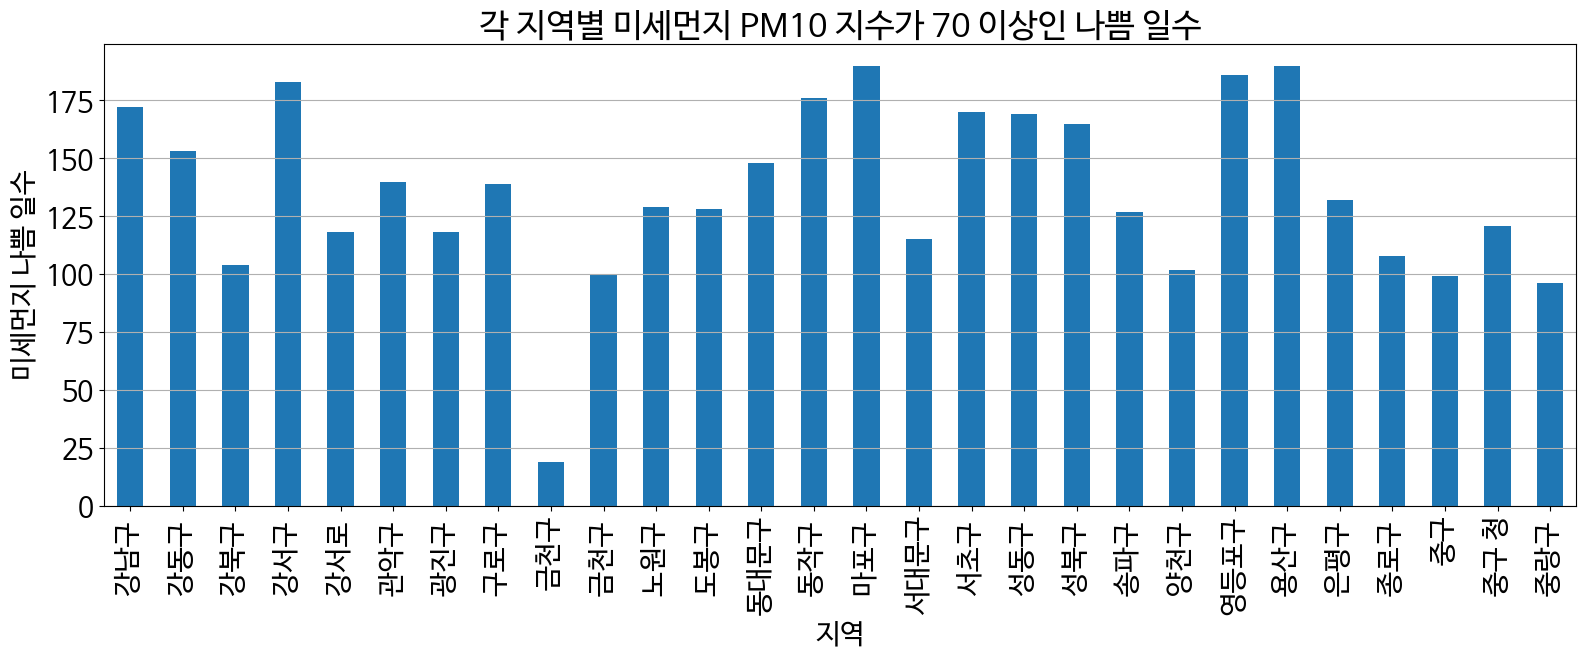

In [120]:
result.plot(kind='bar',  figsize=(19,6))
plt.title("각 지역별 미세먼지 PM10 지수가 70 이상인 나쁨 일수")
plt.xlabel("지역")
plt.ylabel("미세먼지 나쁨 일수")
plt.grid(axis='y')
plt.show()

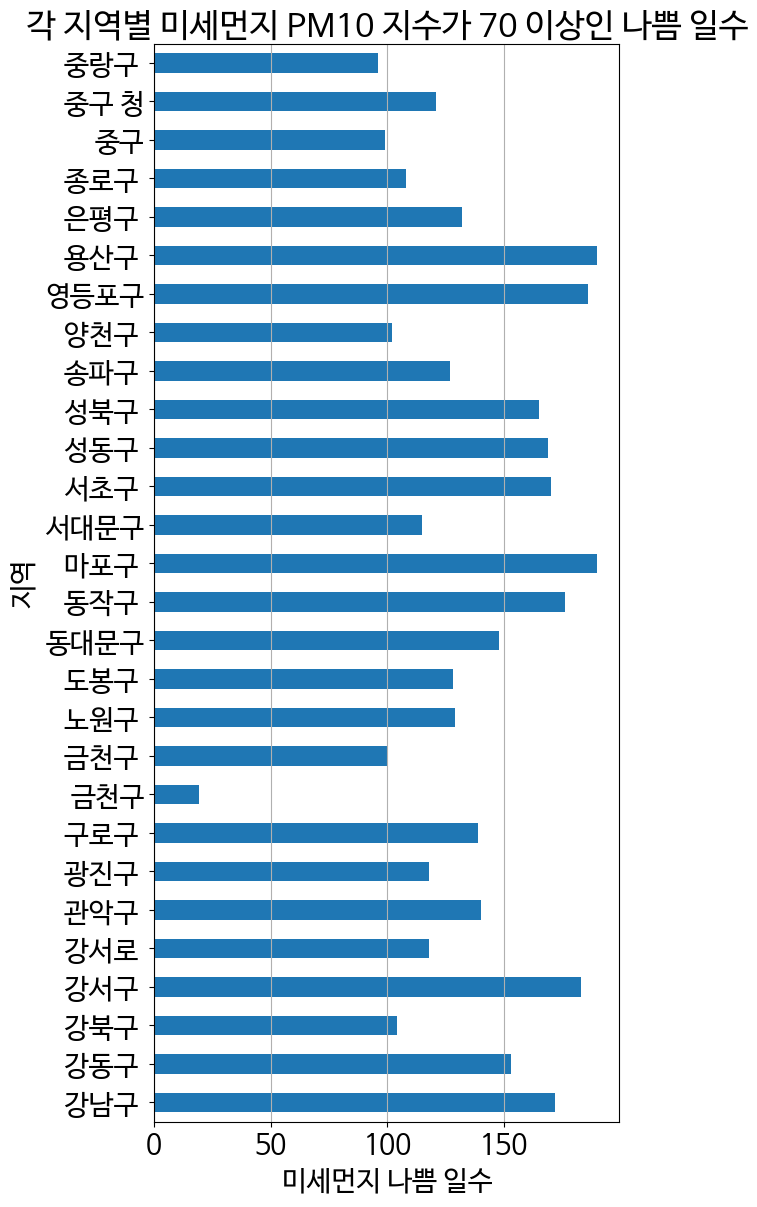

In [121]:
result.plot(kind='barh',  figsize=(6,14))
plt.title("각 지역별 미세먼지 PM10 지수가 70 이상인 나쁨 일수")
plt.xlabel("미세먼지 나쁨 일수")
plt.ylabel("지역")
plt.grid(axis='x')
plt.show()